# Imports

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

# Read the data

In [68]:
df_train = pd.read_csv("covid19-Octuber20.csv")
df_test = pd.read_csv("covid19-test.csv")

# Select columns

In [69]:
cdf_train = df_train[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]
cdf_test = df_test[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]

# Create train and test split

In [70]:
train = cdf_train
test = cdf_test

# Linear regression model

In [71]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['last_available_confirmed']])
train_y = np.asanyarray(train[['last_available_deaths']])

# Training data
regr.fit(train_x, train_y)

# Coefficients
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[0.05234178]]
Intercept:  [-2509.20450633]


# Plotting train model

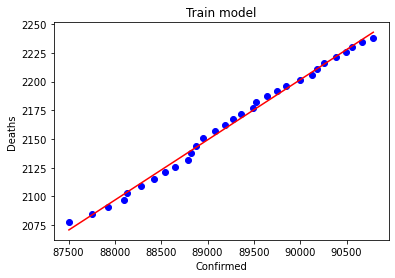

In [81]:
plt.scatter(train.last_available_confirmed, train.last_available_deaths, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Train model")
plt.show()

# Evaluation

In [73]:
test_x = np.asanyarray(test[['last_available_confirmed']])
test_y = np.asanyarray(test[['last_available_deaths']])
test_y_ = regr.predict(test_x)

# Plotting test data

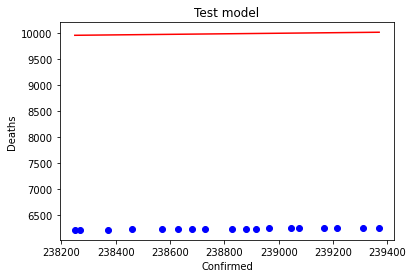

Mean absolute error: 3751.13
Residual sum of squares: 14071004.36
R2-score: -44938.66664


In [84]:
plt.scatter(test.last_available_confirmed, test.last_available_deaths, color='blue')
plt.plot(test_x, regr.coef_[0][0] * test_x + regr.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Test model")
plt.show()

# Accuracy rate
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares: %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.5f" % r2_score(test_y_, test_y))

# Training with the last month

In [75]:
# Read the data
df_train21 = pd.read_csv("covid19-September21.csv")

# Select columns
cdf_train21 = df_train21[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]

train21 = cdf_train21

# Linear regression model with the last month

In [76]:
regr21 = linear_model.LinearRegression()
train21_x = np.asanyarray(train21[['last_available_confirmed']])
train21_y = np.asanyarray(train21[['last_available_deaths']])

# Training data
regr21.fit(train21_x, train21_y)

# Coefficients
print("Coefficient: ", regr21.coef_)
print("Intercept: ", regr21.intercept_)

Coefficient:  [[0.06189817]]
Intercept:  [-8538.23476963]


# Plotting train21 model

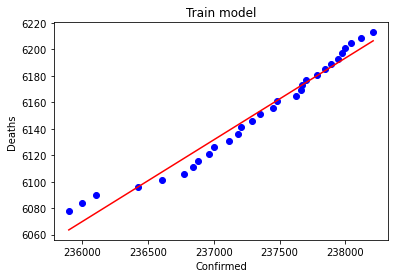

In [77]:
plt.scatter(train21.last_available_confirmed, train21.last_available_deaths, color='blue')
plt.plot(train21_x, regr21.coef_[0][0] * train21_x + regr21.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Train model")
plt.show()

# Evaluation21

In [78]:
test21_x = np.asanyarray(test[['last_available_confirmed']])
test21_y = np.asanyarray(test[['last_available_deaths']])
test21_y_ = regr.predict(test21_x)

# Plotting test model with the train21 equation 

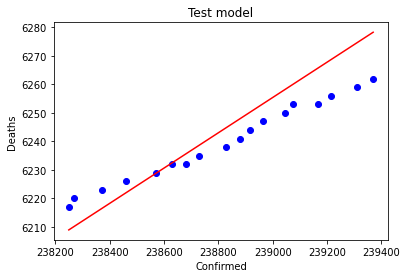

Mean absolute error: 3751.13
Residual sum of squares: 14071004.36
R2-score: -44938.66664


In [79]:
plt.scatter(test.last_available_confirmed, test.last_available_deaths, color='blue')
plt.plot(test21_x, regr21.coef_[0][0] * test21_x + regr21.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Test model")
plt.show()

# Accuracy rate
print("Mean absolute error: %.2f" % np.mean(np.absolute(test21_y_ - test21_y)))
print("Residual sum of squares: %.2f" % np.mean((test21_y_ - test21_y)**2))
print("R2-score: %.5f" % r2_score(test21_y_, test21_y))